In [119]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import DataConversionWarning

### Preprocessing

In [120]:
RAW_recipes=pd.read_csv('RAW_recipes.csv')

##### Creating columns for nutrition values
The nutrition values given are listed as [calories, total_fat, sugar,   sodium, protein, sat_fat carbs]

In [121]:
def Convert_nutri(string): 
    li = list(string.split(", "))
    for i in range(len(li)):
        li[i] = float(li[i])
    return li

allNutriList=['cal', 'totalFat', 'sugar',   'sodium', 'protein', 'satFat', 'carbs']

for j,nutrition in enumerate(allNutriList):
    nutriList=[]
    for i in range(len(RAW_recipes)):
        ss=RAW_recipes.loc[ i , 'nutrition' ]
        ss=ss[1:-1]
        css=Convert_nutri(ss)
        nutriList.append(css[j])
    RAW_recipes[nutrition]=nutriList
    
RAW_recipes.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,cal,totalFat,sugar,sodium,protein,satFat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [122]:
# Removing values according to IQR
print(len(RAW_recipes))
Col_to_clamp=['n_steps','minutes','n_ingredients','cal', 'totalFat', 'sugar',   'sodium', 'protein', 'satFat', 'carbs']
for col in Col_to_clamp:
    IQR = RAW_recipes[col].quantile(0.75) - RAW_recipes[col].quantile(0.25)
    colmax = RAW_recipes[col].quantile(0.75) + 2.5 * IQR
    colmin = RAW_recipes[col].quantile(0.25) - 2.5 * IQR
    RAW_recipes = RAW_recipes[ (RAW_recipes[col] < colmax) & (RAW_recipes[col] > colmin) ]
RAW_recipes=RAW_recipes.reset_index(drop=True)
print(len(RAW_recipes))

231637
177201


### Continuous value prediction

In [ ]:
contValuesDF=pd.DataFrame()
contValuesDF=RAW_recipes[Col_to_clamp]
# pd.plotting.scatter_matrix(contValuesDF, alpha=0.2, figsize=(18, 18))
# plt.show()

In [86]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
testdf4totalFat=pd.DataFrame()
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5

def GradientBoostingRegressor_function(X_train, y_train,X_test):
    gbrt=GradientBoostingRegressor(n_estimators=12, learning_rate=1, max_depth=2, random_state=0) 
    gbrt.fit(X_train, y_train) 
    return(gbrt.predict(X_test))

def r2scoreFun(y_test, y_pred):
    r2score=r2_score(y_test, y_pred)
    return r2score
    
def toPredict(col_predictors,col_to_predict):
    predictedDF=pd.DataFrame(columns=['Predicted','with error','R2 Score'])
    for i,col in enumerate(col_to_predict):
        X=RAW_recipes[col_predictors]
        y=RAW_recipes[[col]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
        y_pred=GradientBoostingRegressor_function(X_train, y_train,X_test)
        y_test=y_test.reset_index(drop=True)
        RMSE=mean_squared_error_(y_test, y_pred)
        r2score=r2scoreFun(y_test, y_pred)
        predictedDF.loc[i]=[col,RMSE,r2score]
        
        if(col=='totalFat'):
            testdf4totalFat[col+'_y_pred']=y_pred
            testdf4totalFat[col+'_y_test']=y_test
            testdf4totalFat[col+'_abs_diff']=testdf4totalFat.apply(lambda x : abs(x[col+'_y_pred']-x[col+'_y_test']), axis=1)
        
        testdf=pd.DataFrame()
        testdf[col+'_y_pred']=y_pred
        testdf[col+'_y_test']=y_test
        testdf[col+'_abs_diff']=testdf.apply(lambda x : abs(x[col+'_y_pred']-x[col+'_y_test']), axis=1)
        print()
        print(testdf.sort_values(by=[col+'_abs_diff']).reset_index(drop=True).head(5))
        print()
    print("\n\n-----Predicting using "+str(col_predictors)+'-----\n')
    print(predictedDF.sort_values(by=['with error']).reset_index(drop=True))
#     return predictedDF
    return testdf
    
col_predictors_nutri=['cal','carbs']
col_to_predict_nutri=['totalFat', 'sugar',   'sodium', 'protein', 'satFat']
Nutri_predictedDF=toPredict(col_predictors_nutri,col_to_predict_nutri)
print("\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
col_predictors_ingre=['n_steps','minutes']
col_to_predict_ingre=['n_ingredients']
cont_predictedDF=toPredict(col_predictors_ingre,col_to_predict_ingre)


   totalFat_y_pred  totalFat_y_test  totalFat_abs_diff
0         7.958699              8.0           0.041301
1        45.933420             46.0           0.066580
2        28.128665             28.0           0.128665
3        12.215889             12.0           0.215889
4        12.215889             12.0           0.215889


   sugar_y_pred  sugar_y_test  sugar_abs_diff
0      0.987076           1.0        0.012924
1      0.987076           1.0        0.012924
2      0.987076           1.0        0.012924
3      2.015951           2.0        0.015951
4      0.304418           0.0        0.304418


   sodium_y_pred  sodium_y_test  sodium_abs_diff
0       6.996471            7.0         0.003529
1      17.308471           17.0         0.308471
2       0.431043            0.0         0.431043
3       0.431043            0.0         0.431043
4       0.431043            0.0         0.431043


   protein_y_pred  protein_y_test  protein_abs_diff
0        7.957483             8.0        

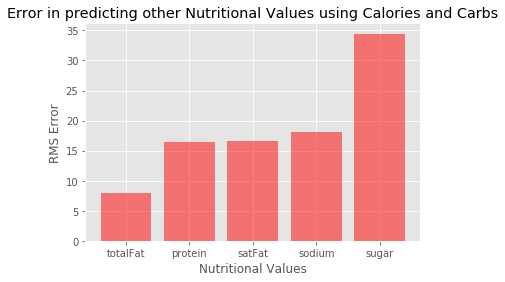

In [40]:
Nutri_predictedDF=Nutri_predictedDF.sort_values(by=['with error']).reset_index(drop=True)
plt.style.use('ggplot')
plt.bar(Nutri_predictedDF['Predicted'], Nutri_predictedDF['with error'], align='center', alpha=0.5,color='red')
plt.xlabel('Nutritional Values')
plt.ylabel('RMS Error')
plt.title('Error in predicting other Nutritional Values using Calories and Carbs')
plt.show()

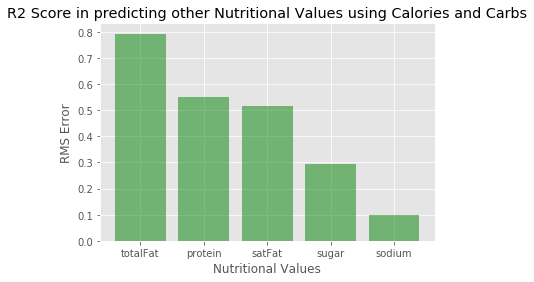

In [39]:
Nutri_predictedDF=Nutri_predictedDF.sort_values(by=['R2 Score'],ascending=False).reset_index(drop=True)
plt.style.use('ggplot')
plt.bar(Nutri_predictedDF['Predicted'], Nutri_predictedDF['R2 Score'], align='center', alpha=0.5,color='green')
plt.xlabel('Nutritional Values')
plt.ylabel('RMS Error')
plt.title('R2 Score in predicting other Nutritional Values using Calories and Carbs')
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


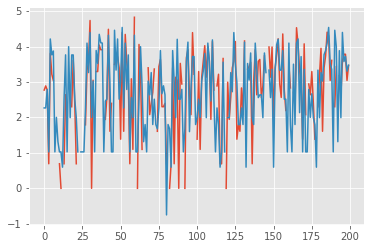

In [76]:
# Nutri_predictedDF=Nutri_predictedDF.sort_values(by='satFat_y_test').reset_index().reset_index().head(100)

fig = plt.figure()
ax = plt.axes()

x = Nutri_predictedDF.index
y = Nutri_predictedDF['satFat_y_test']
z = Nutri_predictedDF['satFat_y_pred']
ax.plot(x, np.log(y));
ax.plot(x, np.log(z));


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


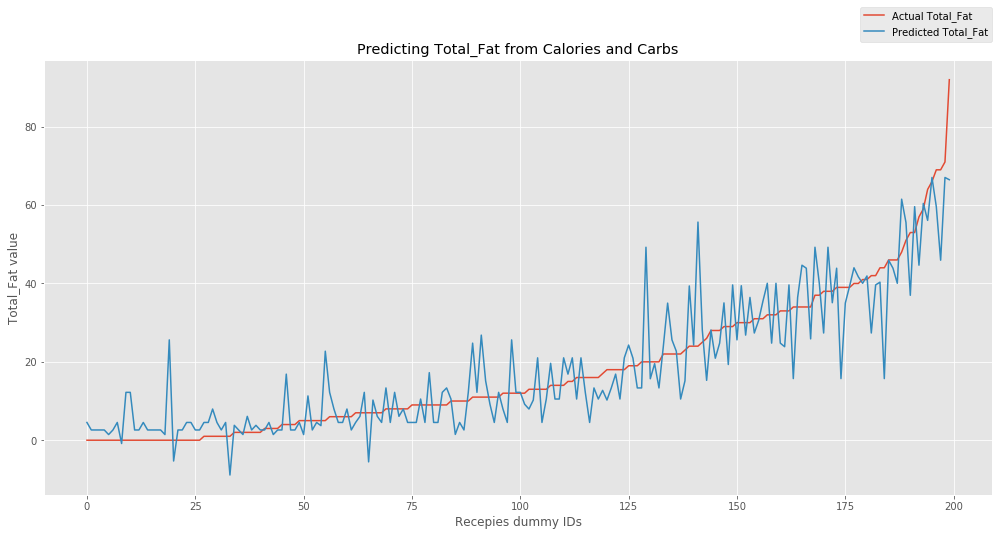

In [117]:
testdf4totalFat=testdf4totalFat.sort_values(by='totalFat_y_test')
testdf4totalFat['rrange']=range(len(testdf4totalFat))

fig = plt.figure(figsize=(17, 8))
plt.xlabel('Recepies dummy IDs')
plt.ylabel('Total_Fat value')
plt.title('Predicting Total_Fat from Calories and Carbs')
ax = plt.axes()

x = testdf4totalFat['rrange']
y = testdf4totalFat['totalFat_y_test']
z = testdf4totalFat['totalFat_y_pred']
plt.plot(x, y,label='Actual Total_Fat')
plt.plot(x, z,label='Predicted Total_Fat')
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='best', borderaxespad=0.)

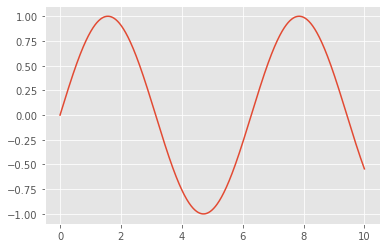

In [56]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

### Apriori

In [19]:
# TODO sample/filter with cusine OR any other criteria
RAW_recipes=RAW_recipes.head(1000)
ingredients_list = RAW_recipes['ingredients'].tolist()
RAW_recipes[['name','ingredients']]

,name,ingredients
0,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ..."
1,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg..."
2,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato..."
3,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n..."
4,apple a day milk shake,"['milk', 'vanilla ice cream', 'frozen apple ju..."
5,aww marinated olives,"['fennel seeds', 'green olives', 'ripe olives'..."
6,berry good sandwich spread,"['whole berry cranberry sauce', 'sour cream', ..."
7,calm your nerves tonic,"['gentian root', 'scullcap herb', 'burnet root..."
8,chile rellenos,"['egg roll wrap', 'whole green chilies', 'chee..."
9,chinese candy,"['butterscotch chips', 'chinese noodles', 'sal..."


In [20]:
def Convert_nutri(string): 
    li = list(string.split('\', \'')) 
    return li
allIngredList=[]
for ind in range(len(RAW_recipes)):
    ss=RAW_recipes.loc[ ind , 'ingredients' ]
    ss=ss[2:-2]
    allIngredList.append(Convert_nutri(ss))
records=allIngredList

In [17]:
# TODO tune apriori parameters
associationRules = apriori(records, min_support=0.0050, min_confidence=0.6, min_lift=3, min_length=5,max_length=None)
associationResult = list(associationRules)

In [18]:
print(len(associationResult))

608


In [9]:
print(associationResult[0])

RelationRecord(items=frozenset({'active dry yeast', 'salt'}), support=0.006, ordered_statistics=[OrderedStatistic(items_base=frozenset({'active dry yeast'}), items_add=frozenset({'salt'}), confidence=1.0, lift=3.1645569620253164)])


In [10]:
for item in associationResult:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " --> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Rule: active dry yeast -> salt
Support: 0.006
Confidence: 1.0
Lift: 3.1645569620253164
Rule: allspice -> cinnamon
Support: 0.005
Confidence: 0.7142857142857143
Lift: 11.520737327188941
Rule: ground cloves -> baking soda
Support: 0.005
Confidence: 0.7142857142857143
Lift: 10.660980810234541
Rule: onion -> bay leaf
Support: 0.009
Confidence: 0.6923076923076923
Lift: 3.9787798408488064
Rule: onion -> beef broth
Support: 0.007
Confidence: 0.7
Lift: 4.022988505747127
Rule: butter -> egg yolks
Support: 0.005
Confidence: 0.625
Lift: 3.324468085106383
Rule: buttermilk -> sugar
Support: 0.011
Confidence: 0.6111111111111112
Lift: 3.532434168272319
Rule: celery -> onion
Support: 0.022
Confidence: 0.6111111111111112
Lift: 3.5121328224776507
Rule: cheddar cheese -> jalapeno pepper
Support: 0.005
Confidence: 0.7142857142857143
Lift: 12.755102040816327
Rule: chopped tomato -> salt
Support: 0.005
Confidence: 1.0
Lift: 3.1645569620253164
Rule: clove -> cinnamon
Support: 0.005
Confidence: 0.625
Lift: 10